# Regularization Example: King County housing

In [1]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', 15)

pd.options.display.max_colwidth = 15

import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Text(0.5, 0, 'Price ($)')

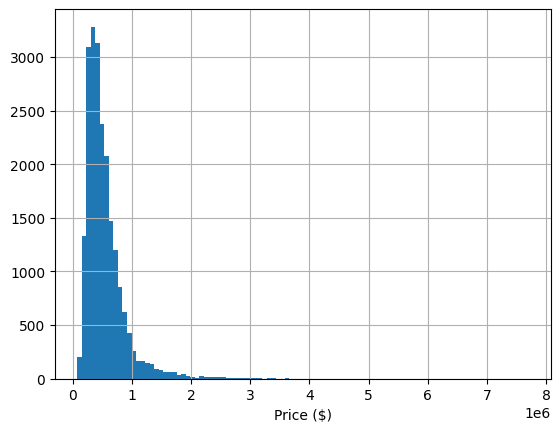

In [4]:
housing_df['price'].hist(bins=100)
plt.xlabel('Price ($)')

In [5]:
housing_df = housing_df.query('bedrooms <= 8')

In [6]:
np.sort(housing_df['yr_renovated'].unique())

array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [7]:
housing_df.loc[housing_df['yr_renovated']==0, 'yr_renovated'] = housing_df.loc[housing_df['yr_renovated']==0, 'yr_built']

In [8]:
np.sort(housing_df['yr_built'].unique())

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [9]:
housing_df['yr_sold'] = housing_df['date'].apply(lambda d: int(d[0:4]))
housing_df['age_built'] = housing_df['yr_sold'] - housing_df['yr_built']
housing_df['age_reno'] = housing_df['yr_sold'] - housing_df['yr_renovated']


In [10]:
columns_to_drop = ['id','date', 'zipcode', 'yr_built', 'yr_renovated']
housing_df.drop(columns = columns_to_drop, inplace=True)

In [11]:
target = ['price']

y = housing_df[target]
X = housing_df.drop(columns = target)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")



In [13]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Scale features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

ss_y = StandardScaler()
y_train_scaled = ss_y.fit_transform(y_train)
y_test_scaled = ss_y.transform(y_test)

In [14]:

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

y_pred_lr_scaled = lr.predict(X_test_scaled)
y_pred_lr = ss_y.inverse_transform(y_pred_lr_scaled)

R2_lr = r2_score(y_test_scaled, y_pred_lr_scaled)

R2_lr

0.6956974268521209

In [15]:
np.logspace(0, 5, 6)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [16]:
alpha_values = np.logspace(-4,3, 8)

ridge_dict = {}
lasso_dict = {}
elastic_dict = {}

R2_dict = {'alpha': alpha_values, 
           'ridge':[], 
           'lasso':[], 
           'elastic':[]}

for a in alpha_values:
    # Ridge Regression
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train_scaled)
    
    y_pred_ridge_scaled = ridge.predict(X_test_scaled)
    y_pred_ridge = ss_y.inverse_transform(y_pred_ridge_scaled.reshape(-1,1))
    
    R2_ridge = r2_score(y_test_scaled, y_pred_ridge_scaled)
    R2_dict['ridge'].append(R2_ridge)
    
    ridge_coef = list(ridge.coef_.flatten().round(2))
    ridge_coef.sort(key = abs, reverse=True)
    ridge_dict[f'alpha_{a:.1e}'] = ridge_coef

    # Lasso Regression
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y_train_scaled)

    y_pred_lasso_scaled = lasso.predict(X_test_scaled)
    y_pred_lasso = ss_y.inverse_transform(y_pred_lasso_scaled.reshape(-1,1))
    
    R2_lasso = r2_score(y_test_scaled, y_pred_lasso_scaled)
    R2_dict['lasso'].append(R2_lasso)
    
    lasso_coef = list(lasso.coef_.flatten().round(2))
    lasso_coef.sort(key = abs, reverse=True)
    lasso_dict[f'alpha_{a: .1e}'] = lasso_coef

    # ElasticNet Regression
    elastic = ElasticNet(alpha=a, l1_ratio=0.5)
    elastic.fit(X_train_scaled, y_train_scaled)

    y_pred_elastic_scaled = elastic.predict(X_test_scaled)
    y_pred_elastic = ss_y.inverse_transform(y_pred_elastic_scaled.reshape(-1,1))
    
    R2_elastic = r2_score(y_test_scaled, y_pred_elastic_scaled)
    R2_dict['elastic'].append(R2_elastic)
    
    elastic_coef = list(elastic.coef_.flatten().round(2))
    elastic_coef.sort(key = abs, reverse=True)
    elastic_dict[f'alpha_{a: .1e}'] = elastic_coef

ridge_df = pd.DataFrame(ridge_dict)
lasso_df = pd.DataFrame(lasso_dict)
elastic_df = pd.DataFrame(elastic_dict)

R2_dict = pd.DataFrame(R2_dict)
display(R2_dict)

print('Ridge Regression')
display(ridge_df)

print('Lasso Regression')
display(lasso_df)

print('ElasticNet Regression')
display(elastic_df)


,alpha,ridge,lasso,elastic
0,0.00,0.70,0.70,0.70
1,0.00,0.70,0.70,0.70
2,0.01,0.70,0.69,0.69
3,0.10,0.70,0.63,0.67
4,1.00,0.70,-0.00,0.19
5,10.00,0.70,-0.00,-0.00
6,100.00,0.70,-0.00,-0.00
7,1000.00,0.69,-0.00,-0.00


Ridge Regression


,alpha_1.0e-04,alpha_1.0e-03,alpha_1.0e-02,alpha_1.0e-01,alpha_1.0e+00,alpha_1.0e+01,alpha_1.0e+02,alpha_1.0e+03
0,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.29
1,0.25,0.25,0.25,0.25,0.25,0.25,0.24,0.20
2,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.20
3,0.21,0.21,0.21,0.21,0.21,0.21,0.21,0.17
4,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.17
5,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.13
6,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11
7,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.10,0.10
8,0.09,0.09,0.09,0.09,0.09,0.09,-0.09,0.08
9,0.08,0.08,0.08,0.08,0.08,0.08,0.08,-0.07


Lasso Regression


,alpha_ 1.0e-04,alpha_ 1.0e-03,alpha_ 1.0e-02,alpha_ 1.0e-01,alpha_ 1.0e+00,alpha_ 1.0e+01,alpha_ 1.0e+02,alpha_ 1.0e+03
0,0.48,0.38,0.38,0.37,0.00,0.00,0.00,0.00
1,0.33,0.34,0.34,0.26,0.00,0.00,0.00,0.00
2,0.25,0.24,0.20,0.15,0.00,0.00,0.00,0.00
3,0.21,0.21,0.20,0.11,0.00,0.00,0.00,0.00
4,0.14,0.14,0.13,0.07,0.00,0.00,0.00,0.00
5,0.11,0.11,0.11,0.05,0.00,0.00,0.00,0.00
6,-0.09,-0.09,0.08,-0.00,0.00,0.00,0.00,0.00
7,0.09,0.09,-0.06,0.00,0.00,0.00,0.00,0.00
8,0.05,0.05,0.04,-0.00,0.00,0.00,0.00,0.00
9,-0.05,0.04,0.03,0.00,0.00,0.00,0.00,0.00


ElasticNet Regression


,alpha_ 1.0e-04,alpha_ 1.0e-03,alpha_ 1.0e-02,alpha_ 1.0e-01,alpha_ 1.0e+00,alpha_ 1.0e+01,alpha_ 1.0e+02,alpha_ 1.0e+03
0,0.55,0.38,0.37,0.34,0.10,0.00,0.00,0.00
1,0.33,0.33,0.33,0.30,0.06,0.00,0.00,0.00
2,0.25,0.24,0.21,0.18,0.00,0.00,0.00,0.00
3,0.21,0.21,0.20,0.12,0.00,0.00,0.00,0.00
4,0.14,0.14,0.13,0.12,0.00,0.00,0.00,0.00
5,0.11,0.11,0.11,0.10,0.00,0.00,0.00,0.00
6,-0.11,-0.09,0.09,0.03,0.00,0.00,0.00,0.00
7,-0.09,0.09,-0.08,0.03,0.00,0.00,0.00,0.00
8,0.09,0.05,0.04,0.01,0.00,0.00,0.00,0.00
9,-0.08,0.04,0.04,0.01,0.00,0.00,0.00,0.00


### Choosing the best models

In [17]:

# Ridge
ridge = Ridge(alpha=100)
ridge.fit(X_train_scaled, y_train_scaled)

y_pred_ridge_scaled = ridge.predict(X_test_scaled)
y_pred_ridge = ss_y.inverse_transform(y_pred_ridge_scaled.reshape(-1,1))

R2_ridge = r2_score(y_test_scaled, y_pred_ridge_scaled)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_pred_lasso_scaled = lasso.predict(X_test_scaled)
y_pred_lasso = ss_y.inverse_transform(y_pred_lasso_scaled.reshape(-1,1))

R2_lasso = r2_score(y_test_scaled, y_pred_lasso_scaled)

# ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train_scaled)

y_pred_elastic_scaled = elastic.predict(X_test_scaled)
y_pred_elastic = ss_y.inverse_transform(y_pred_elastic_scaled.reshape(-1,1))

R2_elastic = r2_score(y_test_scaled, y_pred_elastic_scaled)



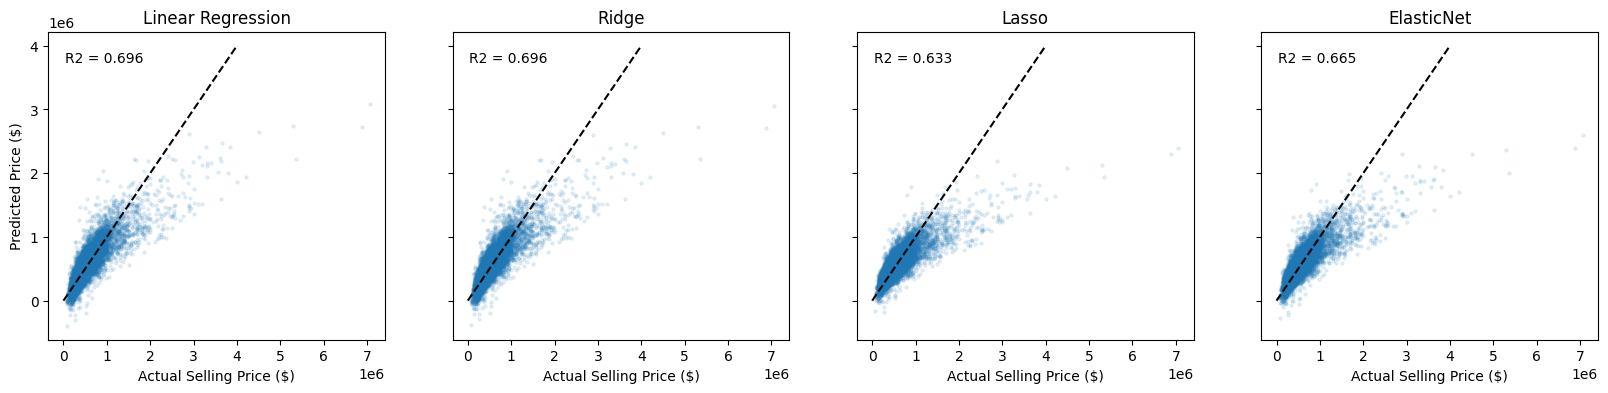

In [18]:
fig, ax = plt.subplots(1,4, figsize = (20,4), sharex=True, sharey=True)

model_names = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
model_predictions = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_elastic]
R2 = [R2_lr, R2_ridge, R2_lasso, R2_elastic]

for k, (mod, pred, R) in enumerate(zip(model_names, model_predictions, R2)):
    ax[k].scatter(y_test, pred, s = 5, alpha = 0.1)
    ax[k].plot([0,4000000], [0, 4000000], 'k--')
    
    ax[k].set_title(mod)
    ax[k].set_xlabel('Actual Selling Price ($)')
    ax[k].text(0.05, 0.9, f'R2 = {R:.3f}', transform=ax[k].transAxes)
    
    if k == 0:
        ax[k].set_ylabel('Predicted Price ($)')


plt.show()

## Hyper-parameter Search and Validation

### Grid Search

How do we explore this space? Suppose I want to try trees with these options:
 - alpha = [0.01, 0.1, 1, 10]
 - l1_ratio= [0.25, 0.5, 0.75]

 How many models will I be testing?

GridSearch does just this in an automated way, testing every combination from the parameters you'd like to test.

| alpha | l1_ratio | Cartesian Product |
|-----------|-------------------|-------------------|
| 0.01      | 0.25              | (0.01, 0.25)      |
| 0.01      | 0.50              | (0.01, 0.50)      |
| 0.01      | 0.75              | (0.01, 0.75)      |
| 0.1       | 0.25              | (0.1, 0.25)       |
| 0.1       | 0.50              | (0.1, 0.50)       |
| 0.1       | 0.75              | (0.1, 0.75)       |
| 1.        | 0.25              | (1, 0.25)      |
| 1.        | 0.50              | (1, 0.50)      |
| 1.        | 0.75              | (1, 0.75)      |
| 10      | 0.25              | (10, 0.25)      |
| 10      | 0.50              | (10, 0.50)      |
| 10      | 0.75              | (10, 0.75)      |




### Cross-Validation

Validation is used to select from a set of candidate models (e.g. different learning algorithms, variations on the same algorithm with different hyperparameters). In the simplest form of validation, we split off a portion of the training data and compare models based on their performance on this validation set. But more commonly, we use K-fold Cross-Validation: 


![CV](../images/grid_search_cross_validation.png)


 - Split the training data into K "folds"
 - Set the first fold aside as a validation set and train on the remaining data.
 - Validate using that first fold as a validation set.
 - Repeat the process (K times in total), each time using a different fold as the validation set.
 - Average the performance across all the training-validation iterations.



### Grid Search + Cross-Validation

Grid Search and Cross-Validation are used in tandem so commonly that sklearn packages them together in some very convenient functions.

 - [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
 - [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html), [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)

In [19]:
# RidgeCV
ridge = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5)
ridge.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_train_ridge = ridge.predict(X_train_scaled)   

# LassoCV
lasso = LassoCV(alphas=np.logspace(-3, 3, 7), cv=5, max_iter=10000)
lasso.fit(X_train_scaled, y_train_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_train_lasso = lasso.predict(X_train_scaled)

# ElasticNetCV
elastic = ElasticNetCV(alphas=np.logspace(-3, 3, 7), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, max_iter=10000)
elastic.fit(X_train_scaled, y_train_scaled)
y_pred_elastic = elastic.predict(X_test_scaled)
y_train_elastic = elastic.predict(X_train_scaled)

In [25]:
lasso.__dict__

{'eps': 0.001,
 'n_alphas': 100,
 'alphas': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'fit_intercept': True,
 'precompute': 'auto',
 'max_iter': 10000,
 'tol': 0.0001,
 'copy_X': True,
 'cv': 5,
 'verbose': False,
 'n_jobs': None,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'n_features_in_': 18,
 'mse_path_': array([[1.17493944, 1.08348981, 0.91379629, 0.94334548, 0.88546225],
        [1.17493944, 1.08348981, 0.91379629, 0.94334548, 0.88546225],
        [1.17493944, 1.08348981, 0.91379629, 0.94334548, 0.88546225],
        [1.17493944, 1.08348981, 0.91379629, 0.94334548, 0.88546225],
        [0.47139429, 0.39173577, 0.31993276, 0.3258653 , 0.31450938],
        [0.391673  , 0.31529641, 0.27752907, 0.27940606, 0.27739959],
        [0.38621254, 0.31204547, 0.27755557, 0.27871435, 0.27824047]]),
 'alpha_': np.float64(0.001),
 'alphas_': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]),
 'coef_': array([-0.08903972,  0.09425803, 

In [20]:
# Vanilla linear
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# ElasticNet
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

In [21]:
# Get feature names
feature_names = np.array(X_train.columns)

# Linear Regression coefficients
lr_weights = lr.coef_.flatten().round(2)
lr_idx = np.argsort(np.abs(lr_weights))[::-1]
lr_features, lr_weights = feature_names[lr_idx], lr_weights[lr_idx]

# Ridge Regression coefficients
ridge_weights = ridge.coef_.flatten().round(2)
ridge_idx = np.argsort(np.abs(ridge_weights))[::-1]
ridge_features, ridge_weights = feature_names[ridge_idx], ridge_weights[ridge_idx]

# Lasso Regression coefficients
lasso_weights = lasso.coef_.flatten().round(2)
lasso_idx = np.argsort(np.abs(lasso_weights))[::-1]
lasso_features, lasso_weights = feature_names[lasso_idx], lasso_weights[lasso_idx]

# ElasticNet Regression coefficients
elastic_weights = elastic.coef_.flatten().round(2)
elastic_idx = np.argsort(np.abs(elastic_weights))[::-1]
elastic_features, elastic_weights = feature_names[elastic_idx], elastic_weights[elastic_idx]



feature_df = pd.DataFrame({
    ('Linear', 'feature'): lr_features, 
    ('Linear','weight'): lr_weights,
    ('Ridge','feature'): ridge_features, 
    ('Ridge','weight'): ridge_weights,
    ('Lasso', 'feature'): lasso_features, 
    ('Lasso', 'weight'): lasso_weights,
    ('Elastic', 'feature'): elastic_features,
    ('Elastic', 'weight'): elastic_weights
})

feature_df.head(200)

Linear                 Ridge                 Lasso         \
          feature weight        feature weight        feature weight   
0           grade   0.33          grade   0.33    sqft_living   0.38   
1       age_built   0.25      age_built   0.24          grade   0.34   
2     sqft_living   0.21    sqft_living   0.21      age_built   0.24   
3             lat   0.21            lat   0.21            lat   0.21   
4      sqft_above   0.19     sqft_above   0.19     waterfront   0.14   
5      waterfront   0.14     waterfront   0.14           view   0.11   
6            view   0.11           view   0.11      bathrooms   0.09   
7       bathrooms   0.09      bathrooms   0.10       bedrooms  -0.09   
8        bedrooms  -0.09       bedrooms  -0.09      condition   0.05   
9   sqft_basement   0.08  sqft_basement   0.08     sqft_above   0.04   
10      condition   0.05      condition   0.05  sqft_living15   0.04   
11  sqft_living15   0.04  sqft_living15   0.05           long  -0.03   
12       age_reno  -0.04           long  -0.03        yr_sold   0.03   
13           long  -0.03     sqft_lot15  -0.03       age_reno  -0.03   
14     sqft_lot15  -0.03        yr_sold   0.03     sqft_lot15  -0.02   
15        yr_sold   0.03       age_reno  -0.03         floors   0.01   
16         floors   0.01         floors   0.01  sqft_basement   0.00   
17       sqft_lot   0.00       sqft_lot   0.00       sqft_lot   0.00   

          Elastic         
          feature weight  
0           grade   0.33  
1     sqft_living   0.25  
2       age_built   0.25  
3             lat   0.21  
4      sqft_above   0.15  
5      waterfront   0.14  
6            view   0.11  
7       bathrooms   0.09  
8        bedrooms  -0.09  
9   sqft_basement   0.06  
10      condition   0.05  
11  sqft_living15   0.04  
12       age_reno  -0.04  
13           long  -0.03  
14     sqft_lot15  -0.03  
15        yr_sold   0.03  
16         floors   0.01  
17       sqft_lot   0.00

In [22]:
feature_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_sold', 'age_built', 'age_reno'], dtype=object)